Using K-means Clustering algortihm to find the class of an Iris

In [19]:
# Import the numpy library and give it an alias 'np'

# Import the pandas library and give it an alias 'pd'

import pandas as pd
import numpy as np

In [20]:
# Read the CSV file 'iris.csv' into a pandas DataFrame and store it in the variable df
# Display the first few rows of the DataFrame df

df = pd.read_csv('/content/iris.csv')
df.head()

sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [21]:
# Finding the no.of unique classes in the target column 'class'

df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [22]:
# Dropping the target column and storing the remaining data in 'new_df'

new_df = df.iloc[:,:-1]

# Printing the first five examples of the 'new_df'

new_df.head()

sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)
0              5.1             3.5              1.4             0.2
1              4.9             3.0              1.4             0.2
2              4.7             3.2              1.3             0.2
3              4.6             3.1              1.5             0.2
4              5.0             3.6              1.4             0.2

In [23]:
# Import the cluster from scikit learn library

from sklearn import cluster

In [24]:
# Iterate through different numbers of clusters from 1 to 10, perform K-means clustering with k-means++ initialization on 'new_df',
# and append the inertia (sum of squared distances of samples to their closest cluster center) to the 'error' list.

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
error

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.47223015873017,
 39.03998724608726,
 34.29971212121213,
 30.06311061745273,
 28.271721728563833,
 26.09432474054042]

In [26]:
# Import the plt from matplotlib library to find the no.of clusters

import matplotlib.pyplot as plt

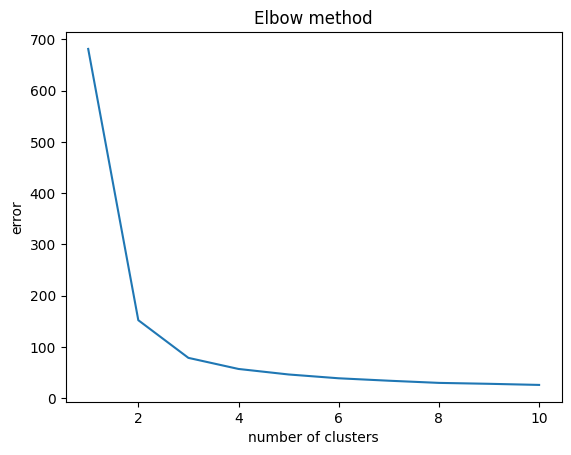

In [27]:
# Find the no.of clusters required to classify using elbow method and plot a graph of it

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [28]:
# Create a K-means clustering model with 3 clusters, using k-means++ initialization, and fixing the random state to 0.

km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [29]:
# Fit the K-means clustering model to the data in 'new_df'.

km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [30]:
# Predict the cluster labels for the data in 'new_df' using the fitted K-means clustering model.

pred = km_model.predict(new_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [31]:
# Test the model with random observation

km_model.predict([[1.1,2.2,4.3,4.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [32]:
km_model.predict([[2.2,2.0,1.1,1.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

Heatmap

<ipython-input-33-b39e8ee1a9c5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

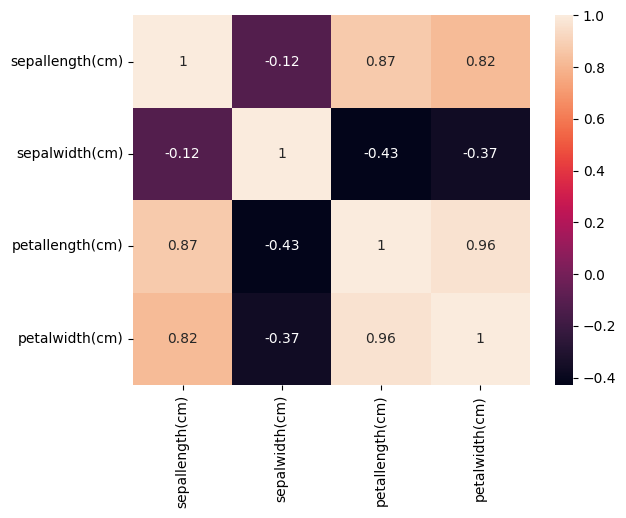

In [33]:
# Import the seaborn library as sns
# Create a heatmap of the correlation matrix for the DataFrame df using sns.heatmap, with annotations for each cell

import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [34]:
from sklearn.metrics import silhouette_score

# new_df contains data and pred contains the predicted cluster labels
silhouette_avg = silhouette_score(new_df, pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5528190123564102


INTERPRETATION

The silhouette score of 0.5528 suggests that the K-Means clustering algorithm produced moderately well-defined clusters for the given dataset. A silhouette score closer to 1 indicates that the clusters are dense and well-separated, while a score closer to -1 suggests overlapping clusters.

In conclusion, based on the silhouette score obtained, the K-Means clustering algorithm demonstrated a reasonable ability to partition the data into distinct clusters, although there may be some room for improvement in terms of cluster separation. Further analysis and potentially trying alternative clustering algorithms could be beneficial for refining the clustering results.